In [1]:
%config Completer.use_jedi = False
from scipy.integrate import odeint
import seaborn as sns
import numpy as np

## 1.2 Solving Ordinary Differential Equations (ODE) Initial Value Problem (IVP) using Numpy and Scipy

### 1.2.1 First Order ODE

Example:

$$\frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right) = t^2$$

Initial condition:
$$y(0) = 1$$


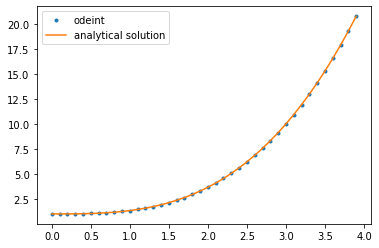

In [2]:
import matplotlib.pyplot as plt
# calculate initial conditions, y0
y0 = [1]

# define vector f(y,t)
def rhs(y, t):
    return [t**2]

t = np.arange(0, 4.0, 0.1)

y_cal = t**3 /3 + 1

y = odeint(rhs, y0, t)

#print(t)
#print(y[:,0])
plt.plot(t, y[:,0], '.')
plt.plot(t[:100], y_cal[:100], '')
plt.legend(['odeint', 'analytical solution'])
plt.show()



____
### 1.2.2 Second Order Ordinary Differential Equations in One dimention

From: http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

Integrating a set of ordinary differential equations (ODEs) given initial conditions is another useful example. The function odeint is available in SciPy for integrating a first-order vector differential equation:

$$\frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right)$$

given initial conditions $\mathbf{y}\left(0\right)=y_{0}$ where $y$ is a length $N$ vector and $f$ is a mapping from $\mathcal{R}^{N}$ to $\mathcal{R}^{N}$. A higher-order ordinary differential equation can always be reduced to a differential equation of this type by introducing intermediate derivatives into the $y$ vector.

For example suppose it is desired to find the solution to the following second-order differential equation:

$$\frac{d^{2}w}{dz^{2}}-zw(z)=0$$

with initial conditions $w\left(0\right)=\frac{1}{\sqrt[3]{3^{2}}\Gamma\left(\frac{2}{3}\right)}$ and $\left.\frac{dw}{dz}\right|_{z=0}=-\frac{1}{\sqrt[3]{3}\Gamma\left(\frac{1}{3}\right)}$. It is known that the solution to this differential equation with these boundary conditions is the Airy function

$$w=\textrm{Ai}\left(z\right)$$

which gives a means to check the integrator using special.airy.

First, convert this ODE into standard form by setting $\mathbf{y}=\left[\frac{dw}{dz},w\right]$ and $t = z$. Thus, the differential equation becomes

$$\begin{split}\frac{d\mathbf{y}}{dt}=\left[\begin{array}{c} ty_{1}\\ y_{0}\end{array}\right]=\left[\begin{array}{cc} 0 & t\\ 1 & 0\end{array}\right]\left[\begin{array}{c} y_{0}\\ y_{1}\end{array}\right]=\left[\begin{array}{cc} 0 & t\\ 1 & 0\end{array}\right]\mathbf{y}.\end{split}$$

In other words,

$$\mathbf{f}\left(\mathbf{y},t\right)=\mathbf{A}\left(t\right)\mathbf{y}$$

As an interesting reminder, if $\mathbf{A}\left(t\right)$ commutes with $\int_{0}^{t}\mathbf{A}\left(\tau\right)\, d\tau$ under matrix multiplication, then this linear differential equation has an exact solution using the matrix exponential:

$$\mathbf{y}\left(t\right)=\exp\left(\int_{0}^{t}\mathbf{A}\left(\tau\right)d\tau\right)\mathbf{y}\left(0\right)$$

However, in this case, $\mathbf{A}(t)$ and its integral do not commute.

There are many optional inputs and outputs available when using odeint which can help tune the solver. These additional inputs and outputs are not needed much of the time, however, and the three required input arguments and the output solution suffice. The required inputs are the function defining the derivative, fprime, the initial conditions vector, $y0$, and the time points to obtain a solution, $t$, (with the initial value point as the first element of this sequence). The output to odeint is a matrix where each row contains the solution vector at each requested time point (thus, the initial conditions are given in the first output row).

The following example illustrates the use of odeint including the usage of the Dfun option which allows the user to specify a gradient (with respect to $y$) of the function, $\mathbf{f}\left(\mathbf{y},t\right)$.

In [3]:
from scipy.special import gamma, airy

# calculate initial conditions, y0
y1_0 = 1.0 / 3**(2.0/3.0) / gamma(2.0/3.0)
y0_0 = -1.0 / 3**(1.0/3.0) / gamma(1.0/3.0)
y0 = [y0_0, y1_0]

# define vector f(y,t)
def func(y, t):
    return [t*y[1],y[0]]

# define gradient matrix
def gradient(y, t):
    return [[0,t], [1,0]]

x = np.arange(0, 4.0, 0.01)
t = x
ychk = airy(x)[0]

y = odeint(func, y0, t)
y2 = odeint(func, y0, t, Dfun=gradient)

print(ychk[:36:6])

print(y[:36:6,1])

print(y2[:36:6,1])

[0.35502805 0.33951139 0.32406751 0.30876307 0.29365818 0.27880648]
[0.35502805 0.33951138 0.32406749 0.30876306 0.29365817 0.27880648]
[0.35502805 0.33951138 0.32406749 0.30876306 0.29365817 0.27880648]


---
**Exercise 1:** Solve

$$\ddot y =  - 4y$$

where $y(0) = 1$ and $\dot y(0) = 0$, on the interval $0 \le t \le 2 \pi$.

First, **write down** the vector $\mathbf{y}$ and the matrix equation for $\frac{d\mathbf{y}}{dt}$.

Then, **write code** to solve the problem.

Finally, **plot graph** of the solution in the interval.

*--->Replace this with $\mathbf{y}$ and  $\frac{d\mathbf{y}}{dt}$*

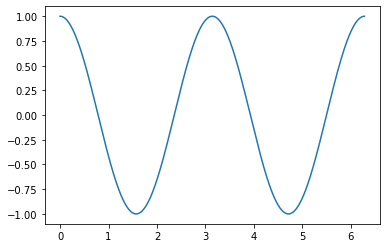

In [4]:
# write codes


import matplotlib.pyplot as plt
%matplotlib inline
# calculate initial conditions, y0
y0 = [1., 0]

# define vector f(y,t)
def rhs(y, t):
    return [y[1], -4*y[0]]

t = np.arange(0, 2*np.pi, 0.01)

# y_cal = t**3 /3 + 1

y = odeint(rhs, y0, t)

# print(t)
# print(y)
plt.plot(t, y[:,0])
# plt.plot(t, y_cal)



---
**Exercise 2:** Large amplitude pendulum

A motion of a pedulum is given exactly (without approximation) by:

$$\ddot \theta =  - \frac{g}{l} sin \theta$$

For simplicity, choose $g = 10\;m/s^2$ and $l = 1\;m$.

First **write down** the vector $\mathbf{\theta}$ and the matrix equation for $\frac{d\mathbf{\theta}}{dt}$. 

**Solve** the problem for the amplitude of oscillation equals to $\frac {\pi}{2}$.

Then, **plot graph** between the angle $\theta$ as a function of time.

What is difference between the periods of the large amplitude oscillation and of the SHM pendulum?

*--->Replace this with $\mathbf{\theta}$ and  $\frac{d\mathbf{\theta}}{dt}$*

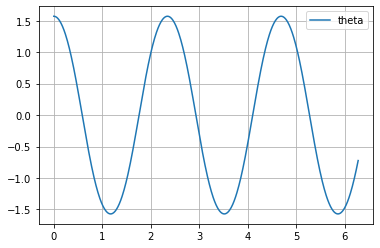

Max Theta: 1.5707963267948966, Pi/2: 1.5707963267948966


In [5]:
# write codes to calculate initial conditions, theta_0
theta0_0 = np.pi / 2
theta1_0 = 0.
theta_0 = [theta0_0, theta1_0]

g = 10.
l = 1.


def func(theta, t):  # define vector f(y,t)
    return [theta[1], -g * np.sin(theta[0]) / l]


t = np.arange(0, 2*np.pi, 0.01)
theta = odeint(func, theta_0, t)

plt.plot(t, theta[:, 0], label='theta')
plt.legend()
plt.grid()
plt.show()

print("Max Theta: %s, Pi/2: %s" % (max(theta[:, 0]), np.pi/2))

---
### 1.2.3 Second order ordinary differential equation in Two dimentions

At this point, it should be obvious how to solve the two dimentional problem, shouldn't it?

We can extend the one dimentional problem to two dimentional problem by modifying the vector $\mathbf {y}$.

Let's consider a position vector $\mathord{\buildrel{\lower3pt\hbox{$\scriptscriptstyle\rightharpoonup$}} \over r}$.

$$\frac{{d\mathord{\buildrel{\lower3pt\hbox{$\scriptscriptstyle\rightharpoonup$}} \over r} }}{{dt}} = \mathord{\buildrel{\lower3pt\hbox{$\scriptscriptstyle\rightharpoonup$}} \over v}$$

which can be written in term of components as

$$\frac{{dx}}{{dt}} = {v_x}$$

$$\frac{{dy}}{{dt}} = {v_y}$$

So vector $\mathbf {y}$ can be modified to

$$\mathbf {y} = \left( {\begin{array}{*{20}{c}}
x\\
{{v_x}}\\
y\\
{{v_y}}
\end{array}} \right)$$


So the equation is now in the form of

$$\frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right)$$

which can be solve with scipy solver.

---
**Excercise 3:** Projectile with air resistance

Consider a projectile problem under gravity $\mathbf g$ and air resistance that is directly proportional to its velocity, i.e. $c \mathbf v$. The equation of motion is governed by:

$$\frac{{d\mathbf v}}{{dt}} = \mathbf g - c \mathbf v$$

given that $g = 9.8\;m/s^2$ and $c = 0.1\;m^{-1}$. Subjected to the initial conditions:

$$v_x = 20 \; m/s \; \text{and}\;  v_y = 0$$

First **write down** the vector $\mathbf{v}$ and the matrix equation for $\frac{d\mathbf{v}}{dt}$.

**Solve** the problem for $x$ and $y$ on the time interval $0 \le t \le 10\; s$..

Then, **plot graph** of both components as function of time.

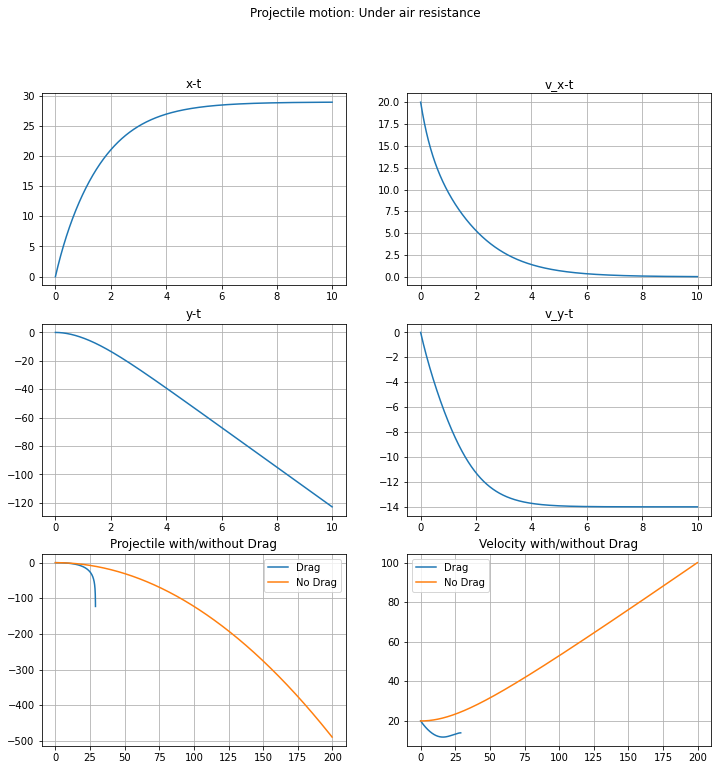

In [6]:
x = 0.
v_x = 20.
y = 0.
v_y = 0.
y_0 = [x, v_x, y, v_y]

g = 9.8
c = 0.1

t = np.arange(0, 10, 0.01)

x_analytical = x + v_x * t
y_analytical = -g * 0.5 * t**2 + y + v_y * t
v_analytical = np.sqrt(v_x**2 + (v_y - g * t)**2)


def func(y, t):  # define vector f(y,t)
    x, v_x, y, v_y = y
    v = np.sqrt(v_x**2 + v_y**2)
    F_drag = 0.5 * c * v**2
    a_x = -F_drag * v_x / v  # 0.5 * -c * v * v_x
    a_y = -g - (F_drag * v_y / v)  # -g - 0.5 * -c * v * v_y
    return [v_x, a_x, v_y, a_y]


vec = odeint(func, y_0, t)
x = vec[:, 0]
v_x = vec[:, 1]
y = vec[:, 2]
v_y = vec[:, 3]
v = np.sqrt(v_x**2 + v_y**2)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Projectile motion: Under air resistance')

sns.lineplot(ax=axes[0, 0], x=t, y=x)
axes[0, 0].set_title("x-t")
axes[0, 0].grid()

sns.lineplot(ax=axes[0, 1], x=t, y=v_x)
axes[0, 1].set_title("v_x-t")
axes[0, 1].grid()

sns.lineplot(ax=axes[1, 0], x=t, y=y)
axes[1, 0].set_title("y-t")
axes[1, 0].grid()

sns.lineplot(ax=axes[1, 1], x=t, y=v_y)
axes[1, 1].set_title("v_y-t")
axes[1, 1].grid()

sns.lineplot(ax=axes[2, 0], x=x, y=y, label='Drag')
sns.lineplot(ax=axes[2, 0], x=x_analytical, y=y_analytical, label='No Drag')
axes[2, 0].set_title("Projectile with/without Drag")
axes[2, 0].grid()
axes[2,0].legend()

sns.lineplot(ax=axes[2, 1], x=x, y=v, label='Drag')
sns.lineplot(ax=axes[2, 1], x=x_analytical, y=v_analytical, label='No Drag')
axes[2, 1].set_title("Velocity with/without Drag")
axes[2, 1].grid()
axes[2,1].legend()
plt.show()